In [13]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist( normalize=True, one_hot_label=True)
print (x_train.shape)
print (t_train.shape)
t_train

(60000, 784)
(60000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print (batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[13160 27691  8608 56724  4032 29722 49096 22139 35443 21984]


In [15]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [16]:
y = np.random.rand(5, 10)
print(y.shape)
print(y)
t = [2, 7, 0, 9, 4]
y[np.arange(5), t]

(5, 10)
[[0.71617383 0.47214337 0.69291084 0.23664685 0.67373493 0.42732793
  0.39997865 0.89721853 0.28604979 0.82758657]
 [0.52676583 0.03371142 0.61732371 0.40702289 0.77727373 0.0699247
  0.07474879 0.23363374 0.95315291 0.36343057]
 [0.19529624 0.31254933 0.00657361 0.09684488 0.341394   0.77426803
  0.08126692 0.33927971 0.47607564 0.86098289]
 [0.16537068 0.71744696 0.06763948 0.82463494 0.63180313 0.8560144
  0.87119424 0.25322867 0.93329282 0.6207898 ]
 [0.2155525  0.17153113 0.37801312 0.19412455 0.15306487 0.86315003
  0.17759497 0.56462132 0.64747519 0.09600916]]


array([0.69291084, 0.23363374, 0.19529624, 0.6207898 , 0.15306487])

In [17]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

In [18]:
net = simpleNet()
print(net.W)

[[-1.28002348  1.1751255   0.42179953]
 [-1.58677913  0.71899477  0.59984696]]


In [19]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


[-2.1961153   1.35217059  0.79294198]


In [20]:
np.argmax(p)

np.int64(1)

In [21]:
t = np.array([0, 0, 1])
net.loss(x, t)


np.float64(1.0294967843885832)

In [22]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])
def f(w):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.01078736  0.3749006  -0.38568796]
 [ 0.01618104  0.5623509  -0.57853194]]


In [23]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from common.functions import sigmoid, sigmoid_grad, softmax
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init=0.01):
        self.params = {}
        self.params['W1'] = weight_init * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    

    def numerical_gradient(self, x, t):
        def loss_W(W):
            return self.loss(x, t)

        grads = {}

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7920666666666667, 0.7965
train acc, test acc | 0.8759833333333333, 0.8806
train acc, test acc | 0.8966333333333333, 0.899
train acc, test acc | 0.9071666666666667, 0.9096
train acc, test acc | 0.9135, 0.9145
train acc, test acc | 0.9187166666666666, 0.9215
train acc, test acc | 0.9229, 0.9239
train acc, test acc | 0.9263833333333333, 0.9278
train acc, test acc | 0.9289666666666667, 0.9305
train acc, test acc | 0.9332333333333334, 0.9342
train acc, test acc | 0.9356833333333333, 0.9375
train acc, test acc | 0.9369833333333333, 0.9386
train acc, test acc | 0.9409, 0.9417
train acc, test acc | 0.9431166666666667, 0.943
train acc, test acc | 0.9449, 0.9443
train acc, test acc | 0.9461333333333334, 0.945


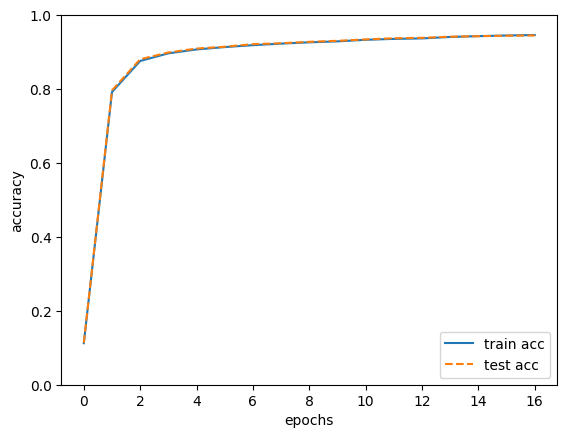

In [24]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()